<a href="https://colab.research.google.com/github/Vaishnavi584/Machine-Learning-Model---mini-project-/blob/main/ML_MODEL_WINE_QUALITY_DATABASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
# Load the Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')  # Load the dataset with ';' as the delimiter


In [17]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



Descriptive Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000    

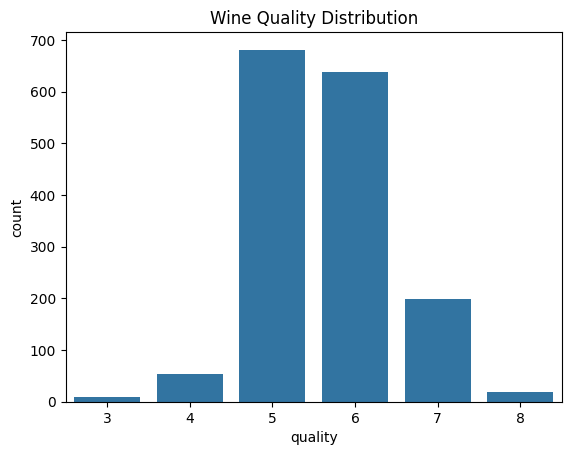

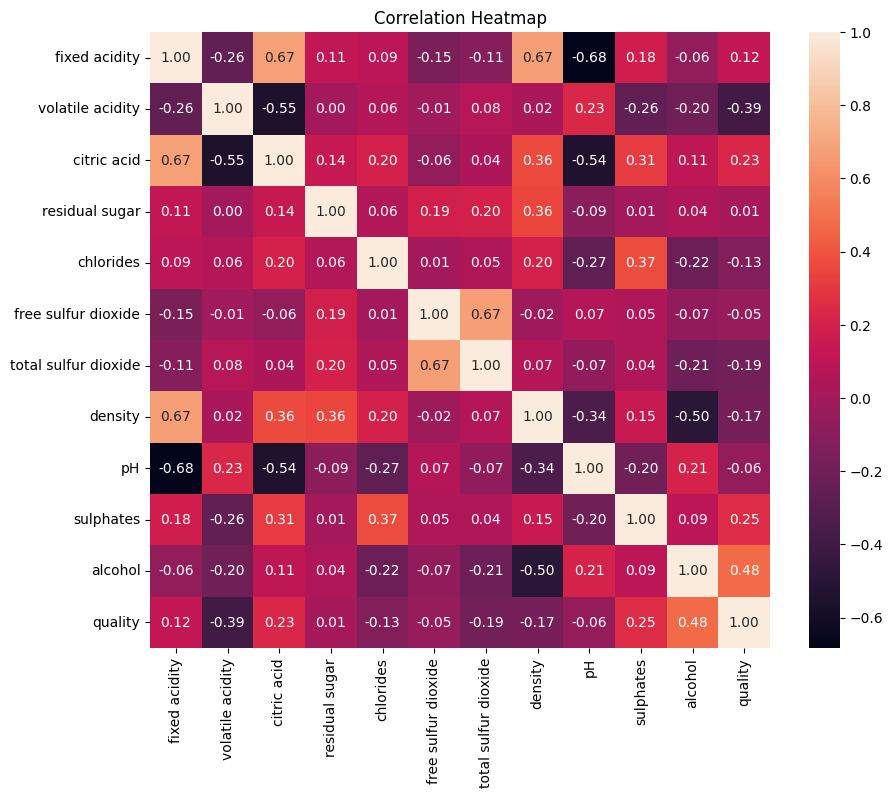

In [19]:
# Descriptive statistics eda
print("\nDescriptive Statistics:\n", df.describe())

# Visualizing quality distribution
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [20]:
# Define features (X) and target variable (y) (Feature Engineering and Selection)
X = df.drop('quality', axis=1)  # Features: all columns except 'quality'
y = df['quality']  # Target: quality of the wine


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
}

# Dictionary to store results
results = {}

# Fit models and perform cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    results[model_name] = {
        'Cross-Validation Mean Score': cv_scores.mean()
    }


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
# Fit models and make predictions(Model Performance Comparison)
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Get detailed metrics
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Store results
    results[model_name].update({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                        Cross-Validation Mean Score  Accuracy  Precision  \
Logistic Regression                        0.602871  0.568750   0.523812   
Decision Tree                              0.591118  0.568750   0.559838   
Support Vector Machine                     0.501973  0.509375   0.564474   

                          Recall  F1 Score  
Logistic Regression     0.568750  0.535139  
Decision Tree           0.568750  0.563864  
Support Vector Machine  0.509375  0.461800  


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [24]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'\nBest Parameters for Decision Tree: {grid_search.best_params_}')
best_tree_model = grid_search.best_estimator_



Best Parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 2}


In [25]:
# Final evaluation of the best model
y_tree_pred = best_tree_model.predict(X_test)

print("\nDecision Tree Final Evaluation:")
print(classification_report(y_test, y_tree_pred))
print(confusion_matrix(y_test, y_tree_pred))



Decision Tree Final Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.65      0.66       130
           6       0.56      0.58      0.57       132
           7       0.47      0.45      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.57      0.57      0.57       320

[[ 0  0  0  1  0  0]
 [ 0  0  5  4  1  0]
 [ 1  8 85 33  3  0]
 [ 0  3 34 77 16  2]
 [ 0  1  2 19 19  1]
 [ 0  0  1  3  1  0]]


In [26]:
# Feature importance
importances = best_tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature ranking for the best Decision Tree model:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")



Feature ranking for the best Decision Tree model:
1. Feature alcohol (0.17138756396684493)
2. Feature sulphates (0.11311331348127168)
3. Feature density (0.11305014483922986)
4. Feature total sulfur dioxide (0.1080435201880528)
5. Feature volatile acidity (0.08791932073702907)
6. Feature citric acid (0.08171934864104524)
7. Feature pH (0.07251141465055208)
8. Feature chlorides (0.07200855603214631)
9. Feature residual sugar (0.070081704600991)
10. Feature fixed acidity (0.05733761978159477)
11. Feature free sulfur dioxide (0.052827493081242356)


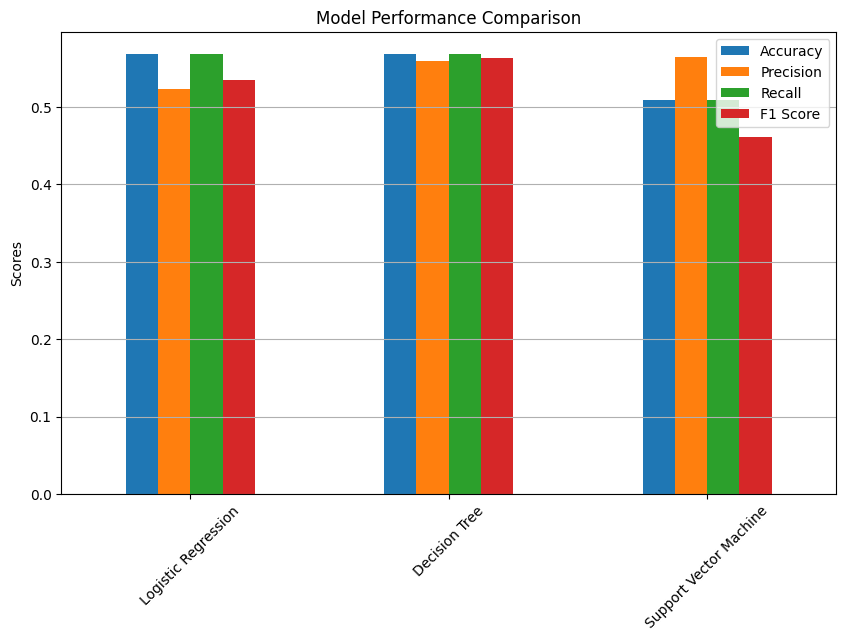

In [27]:
# Visualize the performance
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylabel('Scores')
plt.grid(axis='y')
plt.show()
